In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk import ngrams
from collections import Counter
import warnings
'''to clear the warning message'''
from sklearn.exceptions import ConvergenceWarning
# Filter the warning message
warnings.filterwarnings("ignore", category=FutureWarning)
# Disable convergence warning messages
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Disable Deprecatio warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# ***Importing the dataset***
***

In [2]:
dataset=pd.read_csv("news_set.CSV")

## ***Shape of the dataset***
***

In [3]:
#Shape of the dataset
print("Number of rows:", dataset.shape[0])
print("Number of columns:", dataset.shape[1])

Number of rows: 6335
Number of columns: 5


## ***Column Names & their Data Types***
***

In [4]:
# Display the column names and their data types
print("\nColumn names and data types:")
print(dataset.dtypes)


Column names and data types:
Unnamed: 0.1     int64
Unnamed: 0       int64
title           object
text            object
label           object
dtype: object


# ***Info of the Data***
***

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  6335 non-null   int64 
 1   Unnamed: 0    6335 non-null   int64 
 2   title         6335 non-null   object
 3   text          6335 non-null   object
 4   label         6335 non-null   object
dtypes: int64(2), object(3)
memory usage: 247.6+ KB


## ***Summary of the Statistics***
***

In [6]:
# Display the summary statistics
print("\nSummary statistics:")
print(dataset.describe())


Summary statistics:
       Unnamed: 0.1    Unnamed: 0
count    6335.00000   6335.000000
mean     3167.00000   5280.415627
std      1828.90131   3038.503953
min         0.00000      2.000000
25%      1583.50000   2674.500000
50%      3167.00000   5271.000000
75%      4750.50000   7901.000000
max      6334.00000  10557.000000


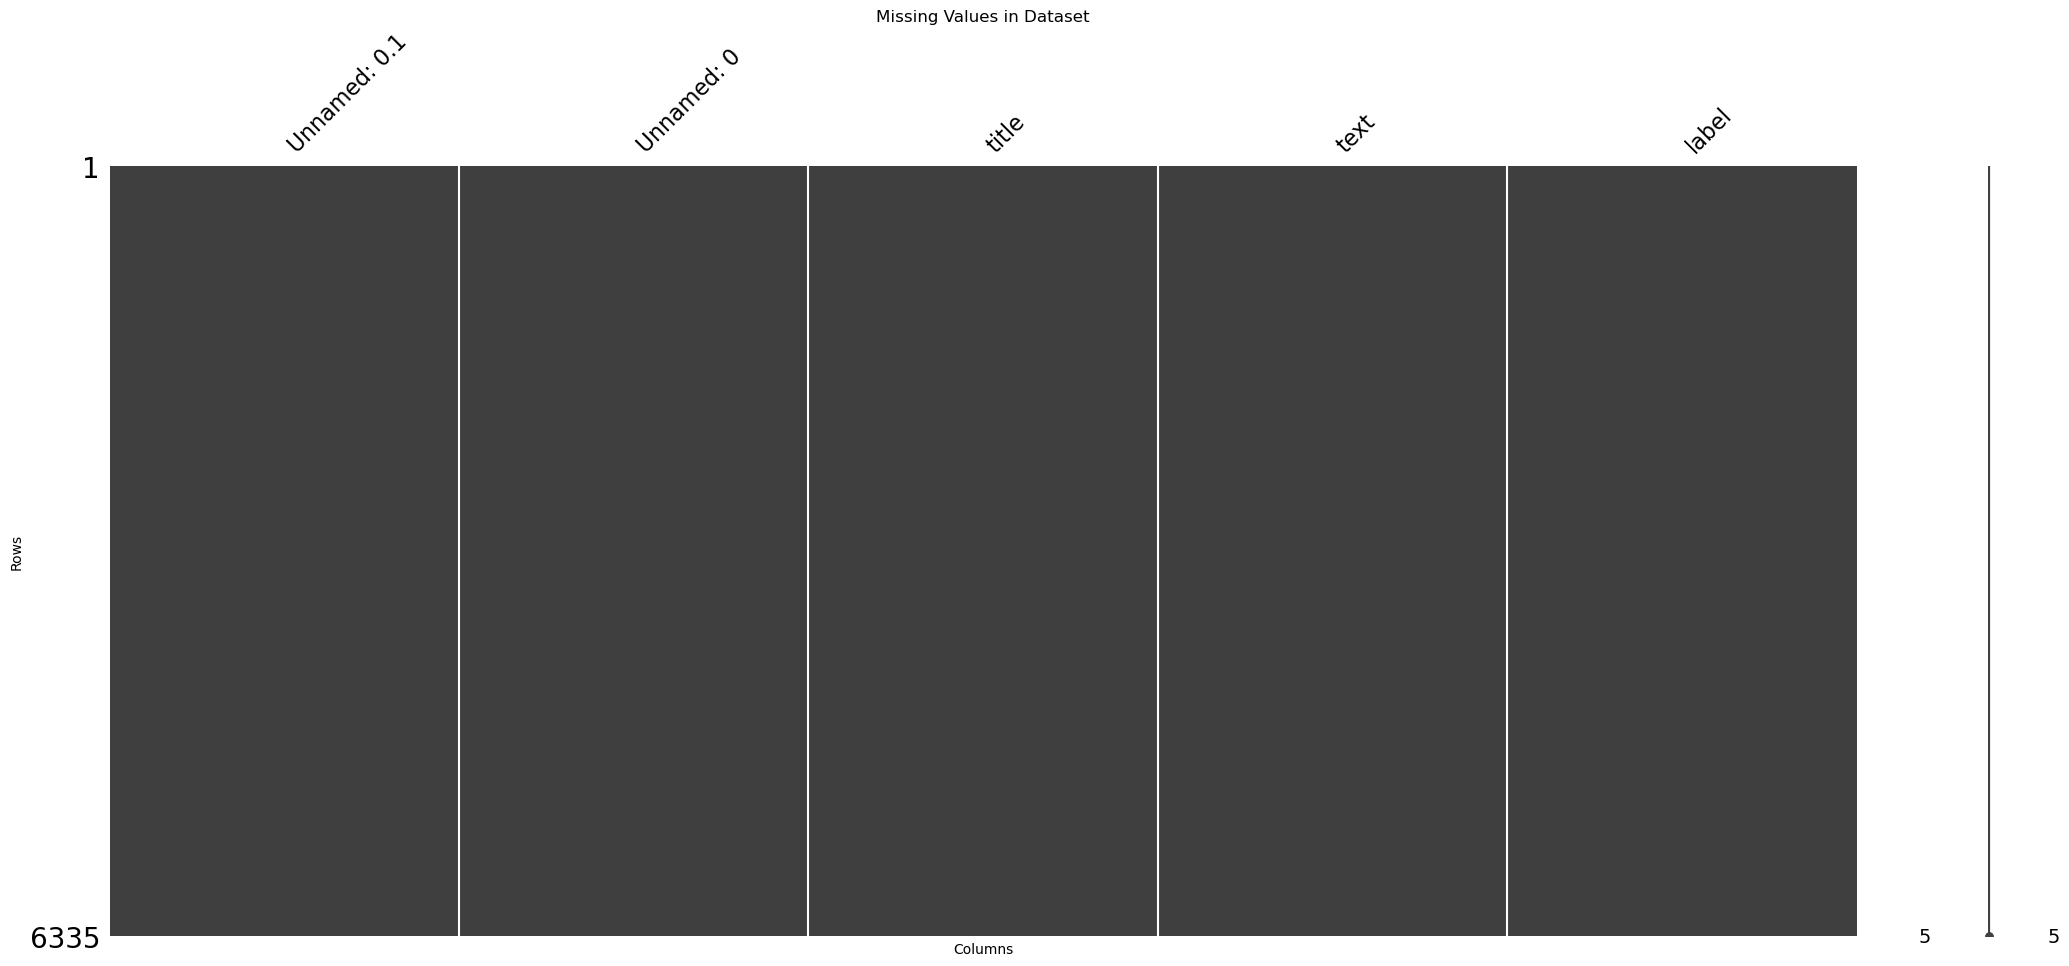

In [7]:
import missingno as msno   # For visualizing missing values
# Plot the missing values for each column
msno.matrix(dataset)

# Add title and labels to the plot
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

In [8]:
# Identify duplicate rows
duplicates = dataset[dataset.duplicated(keep=False)] #duplicated is a pandas library to check for duplicated rows in pandas dataframe
'''Here we used keep=Flase so that the first occurrence of a duplicate row is marked as "not a duplicate",
while subsequent occurrences are marked as "duplicate" and removed from the resulting DataFrame.'''

# Print the duplicate rows
if len(duplicates) > 0:
    print('Duplicate Rows:')
    print(duplicates)
else:
    print('No duplicates found.')

print("Total Duplicate Entries: ", len(duplicates))

No duplicates found.
Total Duplicate Entries:  0


In [9]:
dataset=dataset[['title','text','label']]
dataset.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [10]:
# Calculate the value counts of the "label" column
counts=dataset["label"].value_counts()
print(counts)

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


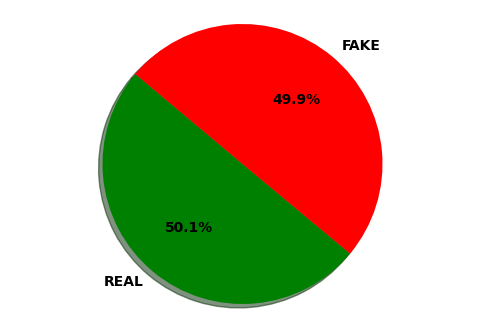

In [11]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the size as needed

# Create a pie chart with custom colors and shadow
colors = ['green', 'red']  # Red for Fake, Blue for Real
explode = (0.1, 0)  # Explode the 1st slice (Fake)
wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%',
                                  startangle=140, colors=colors,  shadow=True)

# Customize the text appearance on the slices
for text in texts + autotexts:
    text.set_fontsize(10)  # Adjust font size
    text.set_fontweight('bold')  # Set text weight

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

# Add a title
#plt.title('Distribution of News Label', fontsize=12)

# Save the plot to a file (optional)
plt.savefig('pie_chart.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

# Display the plot
plt.show()

In [12]:
# Calculate the length of each article
dataset['article_length'] = dataset['text'].apply(lambda x: len(x.split()))

# Create a histogram using Plotly Express
fig = px.histogram(dataset, x='article_length', color='label', nbins=50)

# Update the layout to make the plot smaller
fig.update_layout(width=600, height=400)

# Show the plot
fig.show()

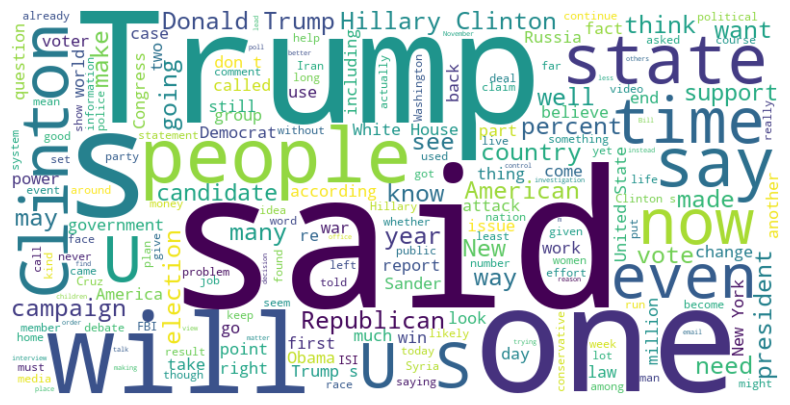

In [13]:
# Concatenate the text from 'title' and 'text' columns
text = ' '.join(dataset['title'].tolist() + dataset['text'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
# Group the data by label and count the number of words in each article
dataset['word_count'] = dataset['text'].apply(lambda x: len(x.split()))
mean_word_count = dataset.groupby('label')['word_count'].mean().reset_index()

# Plot the average word count by label
fig = px.bar(mean_word_count, x='label', y='word_count', color='label',
             title='Average Word Count by Label')
fig.show()

In [15]:
dataset_real=dataset[dataset['label']=="REAL"].copy() #taking only the REAL news
dataset_real["title_text"]=dataset_real['title']+ ' ' +dataset_real["text"] #combining text and title
dataset_real

title  \
2           Kerry to go to Paris in gesture of sympathy   
4      The Battle of New York: Why This Primary Matters   
7                     ‘Britain’s Schindler’ Dies at 106   
8     Fact check: Trump and Clinton at the 'commande...   
9     Iran reportedly makes new push for uranium con...   
...                                                 ...   
6324  Alabama Lawmaker: Same-Sex Couples Don’t Deser...   
6327  GOP Senator David Perdue Jokes About Praying f...   
6330  State Department says it can't find emails fro...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  article_length  \
2     U.S. Secretary of State John F. Kerry said Mon...  REAL             431   
4     It's primary day in New York and front-runners...  REAL             317   
7     A Czech stockbroker who saved more than 650 Je...  REAL             123   
8     Hillary Clinton and Donald Trump made some ina...  REAL            2354   
9     Iranian negotiators reportedly have made a las...  REAL             710   
...                                                 ...   ...             ...   
6324  Most conservatives who oppose marriage equalit...  REAL             288   
6327  The freshman senator from Georgia quoted scrip...  REAL             370   
6330  The State Department told the Republican Natio...  REAL             642   
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL            1120   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL             825   

      word_count                                         title_text  
2            431  Kerry to go to Paris in gesture of sympathy U....  
4            317  The Battle of New York: Why This Primary Matte...  
7            123  ‘Britain’s Schindler’ Dies at 106 A Czech stoc...  
8           2354  Fact check: Trump and Clinton at the 'commande...  
9            710  Iran reportedly makes new push for uranium con...  
...          ...                                                ...  
6324         288  Alabama Lawmaker: Same-Sex Couples Don’t Deser...  
6327         370  GOP Senator David Perdue Jokes About Praying f...  
6330         642  State Department says it can't find emails fro...  
6333        1120  In Ethiopia, Obama seeks progress on peace, se...  
6334         825  Jeb Bush Is Suddenly Attacking Trump. Here's W...  

[3171 rows x 6 columns]

**Importing nltk library**

In [16]:

#!pip install nltk
#import nltk

# nltk.download('wordnet')
import nltk
import subprocess
# nltk.download('stopwords') #to import necessary stopwords
# Download and unzip wordnet
# try:
#     nltk.data.find('wordnet.zip')
# except:
#     nltk.download('wordnet', download_dir='/kaggle/working/')
#     command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
#     subprocess.run(command.split())
#     nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet #to import english words that provides information about their meanings, relationships, and usage

**Defining function to perform preprocessing and cleaning**

In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove('not') #removing not from the stop words
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowercase text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    text = re.sub(r'\W', ' ', text) # Remove all the special characters
    text = re.sub(r'\d+', '', text) # remove numerical values
    text = re.sub(r'<.*?>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # remove all single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # Remove single characters from the start
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Substituting multiple spaces with single space
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split()) # perform lemmatization to get the root of english words
    return text

## ***Cleaning REAL News Data: Enhancing Data Quality***
***

>*In the cleaning phase, we will apply various techniques to improve the quality of the REAL news data. This process involves removing stopwords, converting text to lowercase, handling special characters, and eliminating empty spaces. These steps ensure that the data is refined, consistent, and ready for further analysis.*

In [18]:
dataset_real['title_text']=dataset_real['title_text'].apply(clean_text)
print(dataset_real['title_text'])

2       kerry go paris gesture sympathy s secretary st...
4       battle new york primary matter primary day new...
7       britain schindler dy czech stockbroker saved j...
8       fact check trump clinton commander in chief fo...
9       iran reportedly make new push uranium concessi...
                              ...                        
6324    alabama lawmaker same sex couple don deserve f...
6327    gop senator david perdue joke praying obama de...
6330    state department say can find email clinton sp...
6333    ethiopia obama seek progress peace security ea...
6334    jeb bush suddenly attacking trump here matter ...
Name: title_text, Length: 3171, dtype: object


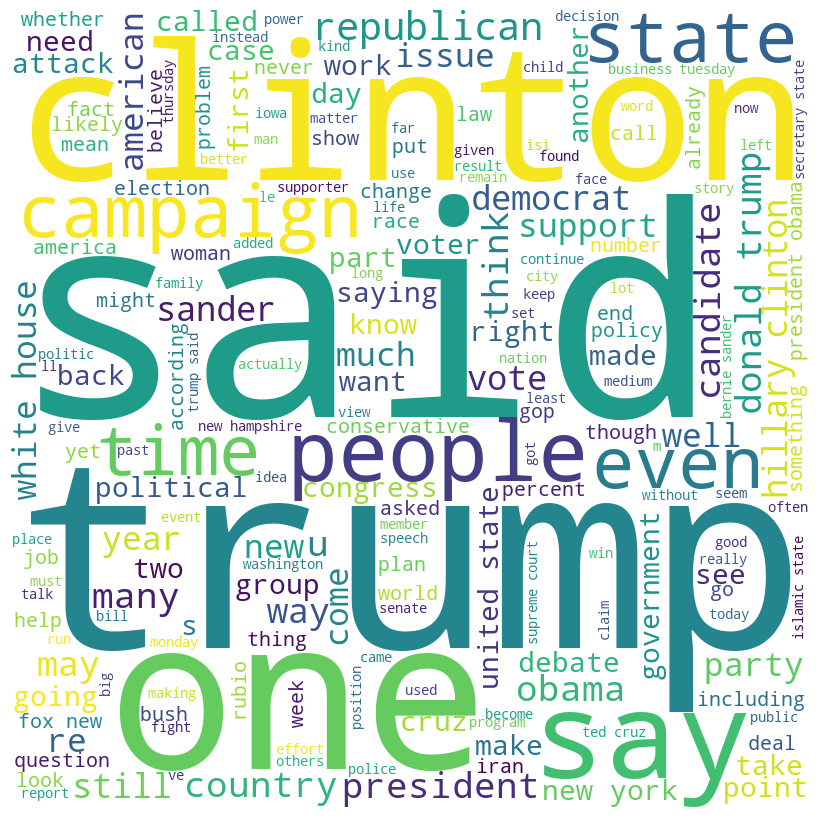

In [19]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews = ' '.join(dataset_real['title_text'])
# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)
# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [20]:
from collections import Counter #to count the occurance of each word
from nltk.tokenize import word_tokenize #to perform tokenization
# Tokenize the text data
tokens = word_tokenize(' '.join(dataset_real["title_text"])) # here all news are concatenated using join to get a single paragraph

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(tokens)

# Convert the word counts to a DataFrame and sort by frequency
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df.sort_values('count', ascending=False, inplace=True)

# Select the top 30 most frequent words
top_words_df = word_counts_df.head(30)

# Create a bar plot of the 30 most frequent words using Plotly
fig = go.Figure(data=[go.Bar(x=top_words_df.index, y=top_words_df['count'])])
fig.update_layout(title='Top 30 Most Frequent Words in Real News', xaxis_title='Words', yaxis_title='Frequency')
fig.show()

In [21]:
# Tokenize the text data
tokens = [word_tokenize(text.lower()) for text in dataset_real["title_text"]] #here each document is tokenized seperately

# Count co-occurring words within a window size of 3
co_occurrence = Counter()
for text in tokens:
    for i, word1 in enumerate(text):
        for j in range(max(0, i-3), i):
            if j < len(text) and text[j] != word1 and text[j] not in stop_words:
                for k in range(max(0, j-3), j):
                    if k < len(text) and text[k] != word1 and text[k] != text[j] and text[k] not in stop_words:
                        words = (word1, text[j], text[k])
                        co_occurrence[words] += 1

# Create a pandas DataFrame of co-occurring words with frequency count
co_occurrence_df = pd.DataFrame(list(co_occurrence.items()), columns=['words', 'count']) #dataframe to store pairs of word and count
co_occurrence_df = co_occurrence_df.sort_values(by='count', ascending=False) #sorting based on count

In [22]:
# Display the top 10 most frequent co-occurring word combinations
print(co_occurrence_df.head(50).to_string(index=False)) #setting index to false

                                words  count
                    (time, york, new)    368
           (obama, barack, president)    349
                     (cruz, ted, sen)    279
           (state, secretary, former)    239
                  (rubio, marco, sen)    222
(candidate, presidential, republican)    195
          (trump, donald, republican)    190
                    (news, fox, told)    186
          (report, press, associated)    184
           (state, united, president)    180
       (clinton, hillary, democratic)    180
                (sander, bernie, sen)    178
            (bush, george, president)    174
               (hampshire, new, iowa)    170
         (report, contributed, press)    166
     (contributed, press, associated)    166
    (report, contributed, associated)    165
              (act, care, affordable)    165
                    (city, york, new)    156
                 (kasich, john, ohio)    156
           (leader, majority, senate)    154
          

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer #importing the library
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a review
def classify_sentiment(review):
    # Use the sentiment analyzer to get the sentiment scores
    sentiment_scores = sia.polarity_scores(review)

    # Determine the overall sentiment label based on the sentiment score
    if sentiment_scores['compound'] >0:
        return 'Positive'
    elif sentiment_scores['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the compound score of a review
def get_compound_score(review):
    sentiment_scores = sia.polarity_scores(review)
    return sentiment_scores['compound']

# Apply the sentiment classifier to each review and create a new column
dataset_real['Sentiment'] = dataset_real['title_text'].apply(classify_sentiment)
dataset_real['compound_score'] = dataset_real['title_text'].apply(get_compound_score)

In [24]:
dataset_real["Sentiment"].value_counts()

Sentiment
Positive    1928
Negative    1210
Neutral       33
Name: count, dtype: int64

In [25]:
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_real['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_real['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_real['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_real.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news using Plotly
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, marker=dict(colors=colors))])
# Update the layout to make the plot smaller
fig.update_layout(width=400, height=400)
#fig.update_layout(title='Distribution of Sentiment of REAL NEWS')
fig.show()

In [26]:
dataset_fake=dataset[dataset['label']=="FAKE"].copy() #taking only the FAKE news
dataset_fake["title_text"]=dataset_fake['title']+ ' ' + dataset_fake["text"] #combining text and title
dataset_fake

title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
3     Bernie supporters on Twitter erupt in anger ag...   
5                                           Tehran, USA   
6     Girl Horrified At What She Watches Boyfriend D...   
...                                                 ...   
6326  DOJ COMPLAINT: Comey Under Fire Over Partisan ...   
6328  Radio Derb Is On The Air–Leonardo And Brazil’s...   
6329  Assange claims ‘crazed’ Clinton campaign tried...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   

                                                   text label  article_length  \
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE            1296   
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE             446   
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE             404   
5       \nI’m not an immigrant, but my grandparents ...  FAKE            2346   
6     Share This Baylee Luciani (left), Screenshot o...  FAKE             553   
...                                                 ...   ...             ...   
6326  DOJ COMPLAINT: Comey Under Fire Over Partisan ...  FAKE             489   
6328                                                     FAKE               0   
6329  Julian Assange has claimed the Hillary Clinton...  FAKE             418   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE            2183   
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE            1947   

      word_count                                         title_text  
0           1296  You Can Smell Hillary’s Fear Daniel Greenfield...  
1            446  Watch The Exact Moment Paul Ryan Committed Pol...  
3            404  Bernie supporters on Twitter erupt in anger ag...  
5           2346  Tehran, USA   \nI’m not an immigrant, but my g...  
6            553  Girl Horrified At What She Watches Boyfriend D...  
...          ...                                                ...  
6326         489  DOJ COMPLAINT: Comey Under Fire Over Partisan ...  
6328           0  Radio Derb Is On The Air–Leonardo And Brazil’s...  
6329         418  Assange claims ‘crazed’ Clinton campaign tried...  
6331        2183  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  
6332        1947  Anti-Trump Protesters Are Tools of the Oligarc...  

[3164 rows x 6 columns]

In [27]:
dataset_fake['title_text']=dataset_fake['title_text'].apply(clean_text)

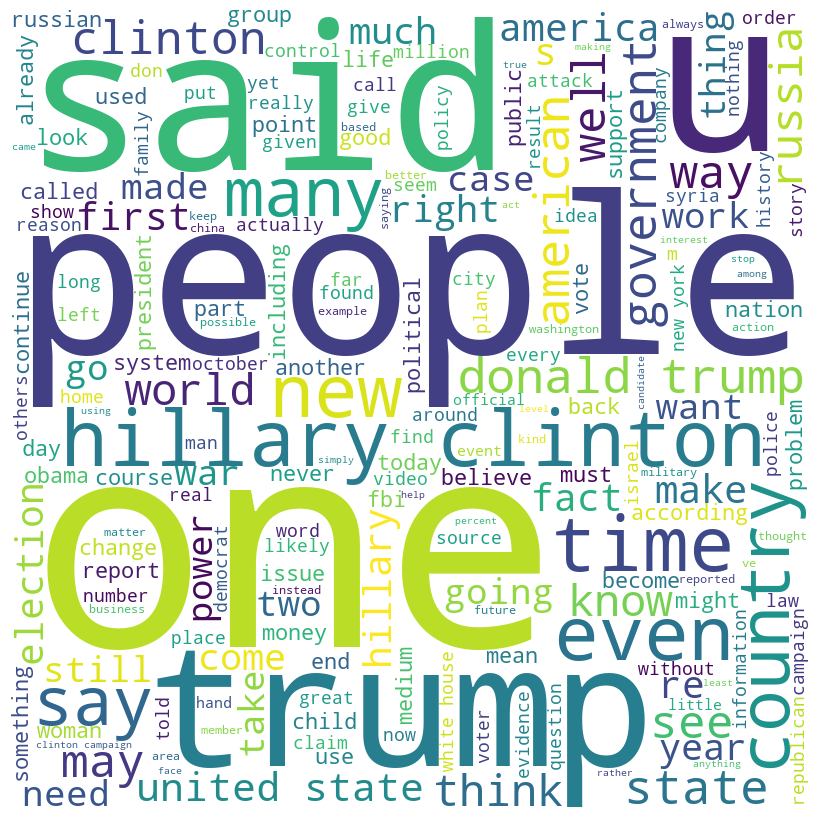

In [28]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews_fake = ' '.join(dataset_fake['title_text'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews_fake)

# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [29]:
from collections import Counter #to count the occurance of each word
from nltk.tokenize import word_tokenize #to perform tokenization
# Tokenize the text data
tokens_fake = word_tokenize(' '.join(dataset_fake["title_text"])) # here all news are concatenated using join to get a single paragraph


tokens_fake = [word for word in tokens_fake if len(word) > 2] #elimating the words having length less than 2

# Count the frequency of each word
word_counts = Counter(tokens_fake)

# Convert the word counts to a DataFrame and sort by frequency
word_counts_df_fake = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df_fake.sort_values('count', ascending=False, inplace=True)

# Create a bar plot of the 30 most frequent words using Plotly
fig = go.Figure(data=[go.Bar(x=word_counts_df_fake.index[:30], y=word_counts_df_fake['count'][:30])])
fig.update_layout(
    title='Top 30 Most Frequent Words in Fake News',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Frequency')
)
fig.show()

In [30]:
# Tokenize the text data
tokens_fake = [word_tokenize(text.lower()) for text in dataset_fake["title_text"]] #here each document is tokenized seperately

# Count co-occurring words within a window size of 3
co_occurrence = Counter()
for text in tokens_fake:
    for i, word1 in enumerate(text):
        for j in range(max(0, i-3), i):
            if j < len(text) and text[j] != word1 and text[j] not in stop_words:
                for k in range(max(0, j-3), j):
                    if k < len(text) and text[k] != word1 and text[k] != text[j] and text[k] not in stop_words:
                        words = (word1, text[j], text[k])
                        co_occurrence[words] += 1

# Create a pandas DataFrame of co-occurring words with frequency count
co_occurrence_df_fake = pd.DataFrame(list(co_occurrence.items()), columns=['words', 'count']) #dataframe to store pairs of word and count
co_occurrence_df_fake = co_occurrence_df_fake.sort_values(by='count', ascending=False) #sorting based on count

In [31]:
# Display the top 10 most frequent co-occurring word combinations
print(co_occurrence_df_fake.head(50).to_string(index=False)) #setting index to false

                                words  count
                    (time, york, new)    265
                  (com, twitter, pic)    206
                     (com, www, http)    199
               (comey, director, fbi)    197
            (email, clinton, hillary)    187
             (comey, james, director)    170
                  (comey, james, fbi)    162
               (james, director, fbi)    160
          (force, brain, utm_content)    154
         (campaign, clinton, hillary)    143
           (state, united, president)    133
            (clinton, hillary, trump)    126
          (trump, donald, republican)    122
           (force, brain, utm_medium)    119
         (brain, utm_content, widget)    119
               (force, brain, widget)    119
     (brain, utm_content, utm_medium)    119
            (brain, utm_content, com)    119
           (pipeline, access, dakota)    111
        (clinton, investigation, fbi)    108
             (hillary, trump, donald)    105
          

**Sentiment Analysis of REAL NEWS**

In [32]:
# Apply the sentiment classifier to each review and create a new column
dataset_fake['Sentiment'] = dataset_fake['title_text'].apply(classify_sentiment)
dataset_fake['compound_score'] = dataset_fake['title_text'].apply(get_compound_score)

In [33]:
dataset_fake["Sentiment"].value_counts()

Sentiment
Positive    1594
Negative    1531
Neutral       39
Name: count, dtype: int64

In [34]:
'''
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_fake['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_fake['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_fake['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_fake.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news
labels = ['Positive', 'Negative', 'Neutral']
values = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3, marker=dict(colors=colors))])
#fig.update_layout(title='Distribution of Sentiment of FAKE NEWS')
fig.update_layout(width=400, height=400)
fig.show()
'''
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_fake['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_fake['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_fake['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_fake.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news using Plotly
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, marker=dict(colors=colors))])
# Update the layout to make the plot smaller
fig.update_layout(width=450, height=400)
#fig.update_layout(title='Distribution of Sentiment of REAL NEWS')
fig.show()

## ***Creating Document-Term Matix***

***

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer #importing TF-IDF
vectorizer = TfidfVectorizer(stop_words='english',
max_features= 1000, # keep top 1000 terms
max_df = 0.5, #terms that appear in more than 50% of the documents will be ignored
smooth_idf=True) # To add 1 to the numerator and denominator of the IDF calculation to avoid division by zero errors
X = vectorizer.fit_transform(dataset_real['title_text'])

X.shape # check shape of the document-term matrix

(3171, 1000)

In [36]:
dataset_model=dataset.copy() #creating a copy of the original dataset
dataset_model["title_text"]=dataset_model['title']+ ' ' + dataset_model["text"] #combining text and title
dataset_model.columns

Index(['title', 'text', 'label', 'article_length', 'word_count', 'title_text'], dtype='object')

In [37]:
#Changing Label from Object to Binary
dataset_model['label'] = dataset_model['label'].replace({'FAKE': 0, 'REAL': 1})
dataset_model

title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  label  \
0     Daniel Greenfield, a Shillman Journalism Fello...      0   
1     Google Pinterest Digg Linkedin Reddit Stumbleu...      0   
2     U.S. Secretary of State John F. Kerry said Mon...      1   
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...      0   
4     It's primary day in New York and front-runners...      1   
...                                                 ...    ...   
6330  The State Department told the Republican Natio...      1   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...      0   
6332   Anti-Trump Protesters Are Tools of the Oligar...      0   
6333  ADDIS ABABA, Ethiopia —President Obama convene...      1   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...      1   

      article_length  word_count  \
0               1296        1296   
1                446         446   
2                431         431   
3                404         404   
4                317         317   
...              ...         ...   
6330             642         642   
6331            2183        2183   
6332            1947        1947   
6333            1120        1120   
6334             825         825   

                                             title_text  
0     You Can Smell Hillary’s Fear Daniel Greenfield...  
1     Watch The Exact Moment Paul Ryan Committed Pol...  
2     Kerry to go to Paris in gesture of sympathy U....  
3     Bernie supporters on Twitter erupt in anger ag...  
4     The Battle of New York: Why This Primary Matte...  
...                                                 ...  
6330  State Department says it can't find emails fro...  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  
6332  Anti-Trump Protesters Are Tools of the Oligarc...  
6333  In Ethiopia, Obama seeks progress on peace, se...  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  

[6335 rows x 6 columns]

In [38]:
#Cleaning the text
dataset_model['title_text']=dataset_model['title_text'].apply(clean_text)

In [39]:
#Seperating Independent and Dependent Variable
X=dataset_model['title_text']
y=dataset_model['label']

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer #importing the tokenizer object
from tensorflow.keras.preprocessing.sequence import pad_sequences # to perform padding

# The maximum number of words to be used. (most frequent)
MAX_Number_of_WORDS = 60000

# Max number of words in each news.
MAX_lenght_of_sequeunce = 250

# fixing the dimention of the word embedding vector
Embedding_Dimention = 100

# Create a tokenizer object with specified parameters
tokenizer = Tokenizer(num_words=MAX_Number_of_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(dataset_model['title_text'].values)

# Get the word-to-index mapping for the tokenizer
word_index = tokenizer.word_index

# Print the number of unique tokens in the vocabulary
print('Found %s unique tokens.' % len(word_index))

# Convert the text data to sequences of integers
X = tokenizer.texts_to_sequences(dataset_model['title_text'].values)

# Pad or truncate sequences to a fixed length
X = pad_sequences(X, maxlen=MAX_lenght_of_sequeunce)

# Print the shape of the data tensor
print('Shape of data tensor:', X.shape)

Found 58551 unique tokens.
Shape of data tensor: (6335, 250)


In [41]:
# Map "positive" and "negative" to 1 and 0, respectively
from sklearn.model_selection import train_test_split
Y= dataset_model["label"]

# Split the data into training and testing sets (80/20 split)
train_texts, rest_texts, train_labels, rest_labels = train_test_split(X,
                                                                      Y,
                                                                      train_size=0.8,
                                                                      random_state=42)

# Split the training data into training and validation sets (80/10/10 split)
test_texts, val_texts, test_labels, val_labels = train_test_split(rest_texts,
                                                                    rest_labels,
                                                                    test_size=0.5,
                                                                    random_state=42)

# Print the shape of each split
print("Shape of training texts: ", train_texts.shape)
print("Shape of training labels: ", train_labels.shape)
print("Shape of validation texts: ", val_texts.shape)
print("Shape of validation labels: ", val_labels.shape)
print("Shape of testing texts: ", test_texts.shape)
print("Shape of testing labels: ", test_labels.shape)

Shape of training texts:  (5068, 250)
Shape of training labels:  (5068,)
Shape of validation texts:  (634, 250)
Shape of validation labels:  (634,)
Shape of testing texts:  (633, 250)
Shape of testing labels:  (633,)


In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional, SpatialDropout1D
# Sequential Model
model = Sequential()

# Embeddidng layer
model.add(Embedding(MAX_Number_of_WORDS, Embedding_Dimention)) # to perform word embedding

# Add a dropout layer to randomly drop some of the input, which can help prevent overfitting
model.add(SpatialDropout1D(0.2))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(32,dropout=0.2, recurrent_dropout=0.2)))

# Dense layers
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         6000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 100)        0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,036,161
Trainable params: 6,036,161
Non-

##***Training the model***
***

In [43]:
import time
start_time = time.time()
epochs=5
batch_size=32
history = model.fit(train_texts, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_texts, val_labels),verbose=2)
end_time = time.time()
training_time = end_time - start_time

print("Training time:", training_time, "seconds")

Epoch 1/5


2024-04-01 23:25:54.470815: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


159/159 - 30s - loss: 0.4348 - acc: 0.8013 - val_loss: 0.2269 - val_acc: 0.9164 - 30s/epoch - 188ms/step
Epoch 2/5
159/159 - 32s - loss: 0.1209 - acc: 0.9588 - val_loss: 0.1965 - val_acc: 0.9274 - 32s/epoch - 198ms/step
Epoch 3/5
159/159 - 32s - loss: 0.0355 - acc: 0.9878 - val_loss: 0.2508 - val_acc: 0.9180 - 32s/epoch - 200ms/step
Epoch 4/5
159/159 - 32s - loss: 0.0100 - acc: 0.9972 - val_loss: 0.2687 - val_acc: 0.9338 - 32s/epoch - 200ms/step
Epoch 5/5
159/159 - 31s - loss: 0.0061 - acc: 0.9988 - val_loss: 0.2747 - val_acc: 0.9227 - 31s/epoch - 196ms/step
Training time: 156.17592906951904 seconds


**Checking Train loss and Validation loss with respect to epochs**

In [44]:
# Plot training and validation loss
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['loss'], mode='lines', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig_loss.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig_loss.show()

##***Checking train accuracy and Validation Accuracy with respect to epochs***
***

In [45]:
# Plot training and validation accuracy
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['acc'], mode='lines', name='Training Accuracy'))
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['val_acc'], mode='lines', name='Validation Accuracy'))
fig_acc.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig_acc.show()

##***Checking the performance on the test set***
***

In [46]:
performance = model.evaluate(test_texts, test_labels)
print('Test Set Loss: {:0.3f}\ n  Test Set Accuracy: {:0.4f}'.format(performance[0],performance[1]))

20/20 [==============================] - 1s 27ms/step - loss: 0.3300 - acc: 0.9115
Test Set Loss: 0.330\ n  Test Set Accuracy: 0.9115


##***Importing the Keras and Tensorflow Library***
***

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##***Creating Transformer block***
***

In [48]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6) #epsilon=1e-6 to avoid zero division error during normalization
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) #skip connection
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training) #skip conneciton
        return self.layernorm2(out1 + ffn_output)

##***Creating embeddings with positional Encodding***
***

In [49]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

##***Preparing the data for the model***
***

In [50]:
# Define the Transformer model for text classification
vocab_size = 60000  # Define your vocabulary size
maxlen = 250  # Define your maximum sequence length
embed_dim = 100  # Define your embedding dimension
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in the feed-forward network

##***Developing the model***
***

In [51]:
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x, training=True)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_transformer = keras.Model(inputs=inputs, outputs=outputs)

##***Compiling the model***
***

In [52]:
model_transformer.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_transformer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 token_and_position_embeddin  (None, 250, 100)         6025000   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 250, 100)         87632     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 100)               0     

##***Training the model and computing the training time***
***

In [53]:
import time
start_time = time.time()
history_transformer = model_transformer.fit(train_texts, train_labels,
                    batch_size=64, epochs=5,
                    validation_data=(val_texts,val_labels)
                   )
end_time = time.time()
training_time = end_time - start_time

print("Training time:", training_time, "seconds")

Epoch 1/5
80/80 [==============================] - 17s 205ms/step - loss: 0.4730 - accuracy: 0.7626 - val_loss: 0.3931 - val_accuracy: 0.8218
Epoch 2/5
80/80 [==============================] - 17s 207ms/step - loss: 0.1584 - accuracy: 0.9410 - val_loss: 0.2427 - val_accuracy: 0.9085
Epoch 3/5
80/80 [==============================] - 17s 208ms/step - loss: 0.0853 - accuracy: 0.9663 - val_loss: 0.3176 - val_accuracy: 0.8975
Epoch 4/5
80/80 [==============================] - 17s 212ms/step - loss: 0.0251 - accuracy: 0.9899 - val_loss: 0.2413 - val_accuracy: 0.9259
Epoch 5/5
80/80 [==============================] - 17s 214ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.2757 - val_accuracy: 0.9211
Training time: 84.21060681343079 seconds


##***Checking the performance of the mode on the test set***
***

In [54]:
performance_transformer = model_transformer.evaluate(test_texts, test_labels)
print('Test Set Loss: {:0.3f}\ n  Test Set Accuracy: {:0.4f}'.format(performance_transformer[0],performance_transformer[1]))

20/20 [==============================] - 1s 44ms/step - loss: 0.3554 - accuracy: 0.9194
Test Set Loss: 0.355\ n  Test Set Accuracy: 0.9194


##***Checking Train loss and Validation loss with respect to epochs***
***

In [55]:
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['loss'], mode='lines', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['val_loss'], mode='lines', name='Validation Loss'))
fig_loss.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig_loss.show()

##***Checking Train Accuracy and Validation Accuracy with respect to epochs***
***

In [56]:
# Plot training and validation accuracy
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['accuracy'], mode='lines', name='Training Accuracy'))
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig_acc.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig_acc.show()

##***Making a single prediciton using Transformer Model***
***

In [64]:
news="President Jane Smith has announced a new initiative aimed at combating climate change. The policy, which includes a significant increase in renewable energy investments and stricter environmental regulations, is set to be implemented over the next five years. The president has called for global cooperation to achieve these goals, emphasizing the urgency of addressing climate change. Critics argue that the policy does not go far enough, while supporters praise the president's commitment to environmental sustainability"
# news="False voting machine claims Claims that voting machines flip votes from Republicans to Democrats and vice versa have dogged US elections for years. Yet to date there is no evidence to suggest that election tampering has taken place.A handful of posts recently began circulating on social media from voters in Texas who claimed that voting machines were switching their votes from Democrat to Republican. One tweet read: Texas GOP up to the same dirty tricks. Local county officials and the secretary of state's office all confirmed receiving a small handful of reports relating to voters experiencing difficulties with touch screen machines, and have encouraged voters to review their ballots before submitting them."
clean_news=clean_text(news)
# Convert the text data to sequences of integers
X_single = tokenizer.texts_to_sequences([clean_news])
score = sia. polarity_scores(clean_news)
# Pad or truncate sequences to a fixed length
X_single = pad_sequences(X_single, maxlen=MAX_lenght_of_sequeunce)

if score['compound'] > 0:
    print('Positive')
elif score['compound'] <0:
    print('Negative')
else:
    print('Neutral')
    

Positive


In [58]:
output = model_transformer.predict(X_single, batch_size=1, verbose=2)[0]

print(output)

if output>=0.5:
  print("It's a real News")
else:
  print("It's a fake News")

1/1 - 0s - 118ms/epoch - 118ms/step
[0.09817313]
It's a fake News


##***Making a single prediciton using LSTM Model***
***

In [59]:
output_LSTM = model.predict(X_single, batch_size=1, verbose=2)[0]

print(output_LSTM)

if output_LSTM>=0.5:
  print("It's a real News")
else:
  print("It's a fake News")

1/1 - 0s - 185ms/epoch - 185ms/step
[0.00353352]
It's a fake News


In [60]:
# import pickle


# token = open('tokenizer.pkl', 'wb')
# pickle.dump(tokenizer,token)
# token.close()


# modell = open('lstm_model.pkl', 'wb')
# pickle.dump(model,modell)
# modell.close()
    


In [65]:
import pickle

senti = open('senti.pkl', 'wb')
pickle.dump(sia,senti)
senti.close()

token = open('tokenizer.pkl', 'wb')
pickle.dump(tokenizer,token)
token.close()

model.save('lstm_model.h5')
